In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfd = pd.read_csv('../datafiles/pca_mnist.csv')
df= dfd.head(15000)

In [3]:
labels = df.label.copy()
df.drop(labels='label',axis = 1,inplace=True)

In [4]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(df)
print(std_data.shape,df.shape)

(15000, 784) (15000, 784)


In [5]:
cov_data = np.matmul(std_data.T,std_data)
cov_data.shape

(784, 784)

In [6]:
from scipy import linalg
e_val , e_vec = linalg.eigh(cov_data,eigvals=(782,783))
print(df.shape,e_vec.shape)

(15000, 784) (784, 2)


In [7]:
new_data= np.matmul(std_data,e_vec)
new_data.shape

(15000, 2)

In [8]:
ndf = pd.DataFrame(data = new_data,columns=['col1','col2'])
ndf['labels']=labels
ndf

col1       col2  labels
0     -5.558661  -5.043558       1
1      6.193635  19.305278       0
2     -1.909878  -7.678775       1
3      5.525748  -0.464845       4
4      6.366527  26.644289       0
...         ...        ...     ...
14995  3.139416  -4.758956       1
14996  1.946714  -1.314215       4
14997 -2.147937  -1.507269       8
14998  3.204122  -6.537313       9
14999 -6.878969  -1.256254       6

[15000 rows x 3 columns]

In [9]:
ndf['labels'] = ndf['labels'].astype(str)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    15000 non-null  float64
 1   col2    15000 non-null  float64
 2   labels  15000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 351.7+ KB


In [10]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    15000 non-null  float64
 1   col2    15000 non-null  float64
 2   labels  15000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 351.7+ KB


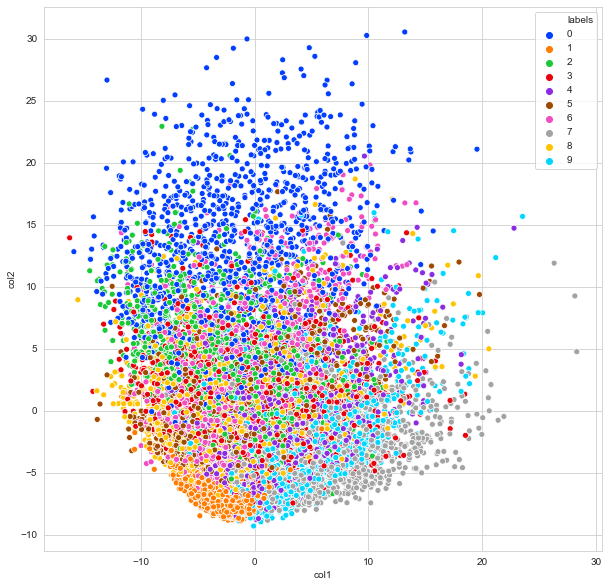

In [11]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x='col1',y='col2',hue='labels',data=ndf,legend="full",palette=sns.color_palette("bright", 10))

### Principal Component Analysis using sickit learn

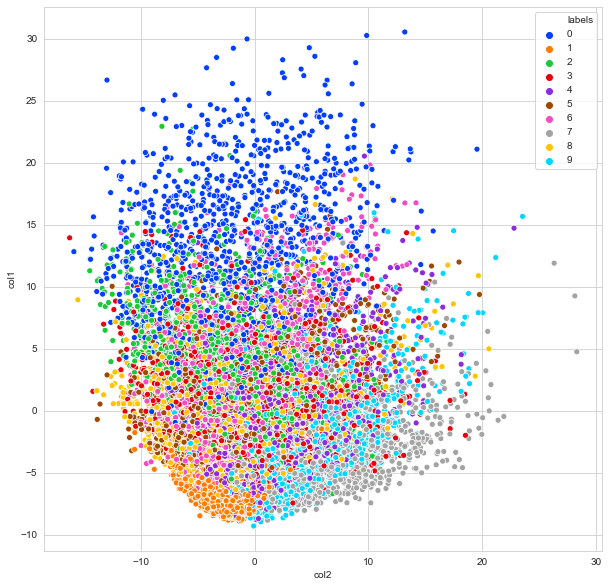

In [12]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_data = pca.fit_transform(std_data)
pca_fin = pd.DataFrame(data = pca_data,columns=['col1','col2'])
pca_fin['labels']=labels.astype(str)
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x='col2',y='col1',hue='labels',data=pca_fin,legend="full",palette=sns.color_palette("bright", 10))

In [21]:
# pca = decomposition.PCA()
pca.n_components = 784
pca_data = pca.fit_transform(std_data)
percentage_variance_explained_calculated = pca.explained_variance_ / np.sum(pca.explained_variance_)
pca.explained_variance_;

In [32]:
pca.explained_variance_ratio_; 

In [33]:
percentage_variance_explained_calculated; # is exactly same is pca.explained_variance_ratio_

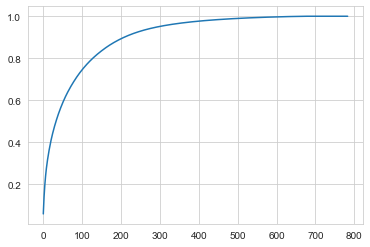

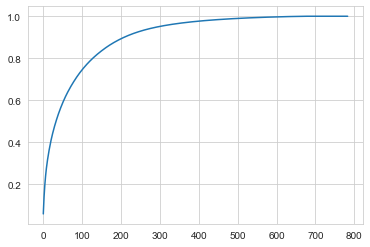

In [29]:
cumulative_var_explained = np.cumsum(pca.explained_variance_ratio_)
temm = np.cumsum(percentage_variance_explained_calculated)
plt.figure(figsize=(6,4))
plt.plot(cumulative_var_explained)
plt.figure()
plt.plot(temm)

NameError: name 'plot' is not defined